<a href="https://colab.research.google.com/github/mathan200617/Guarding-transaction-with-AI-powered-fraud-credit-card-detection-and-prevention/blob/main/S_mathan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       182
           1       0.17      0.06      0.08        18

    accuracy                           0.89       200
   macro avg       0.54      0.51      0.51       200
weighted avg       0.85      0.89      0.86       200

Confusion Matrix:
[[177   5]
 [ 17   1]]


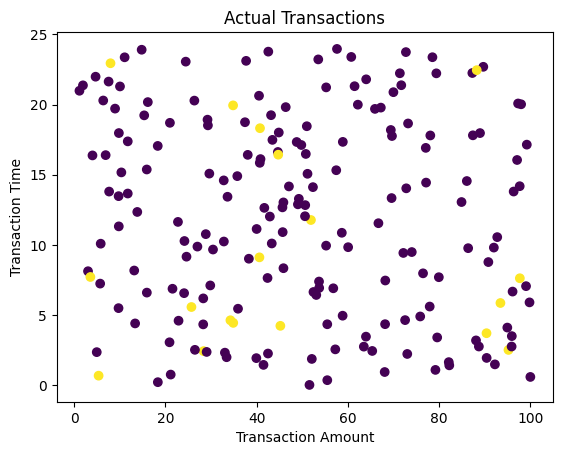

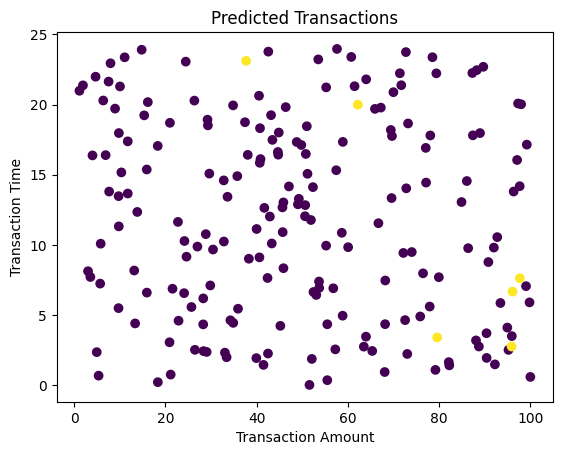

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generate sample data (replace with your own dataset)
np.random.seed(0)
data = pd.DataFrame({
    'transaction_amount': np.random.uniform(0, 100, 1000),
    'transaction_location': np.random.choice(['local', 'foreign'], 1000),
    'transaction_time': np.random.uniform(0, 24, 1000),
    'is_fraud': np.random.choice([0, 1], 1000, p=[0.9, 0.1])  # 10% fraudulent transactions
})

# Convert categorical variables to numerical variables
data['transaction_location'] = data['transaction_location'].map({'local': 0, 'foreign': 1})

# Split data into training and testing sets
X = data[['transaction_amount', 'transaction_location', 'transaction_time']]
y = data['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize the results
plt.scatter(X_test['transaction_amount'], X_test['transaction_time'], c=y_test)
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Time')
plt.title('Actual Transactions')
plt.show()

plt.scatter(X_test['transaction_amount'], X_test['transaction_time'], c=y_pred)
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Time')
plt.title('Predicted Transactions')
plt.show()